# TP3 - Views, Updates and Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a Social Network

___

For the first 2 parts we will use the **`wine.db`** database and the Tables created in TP2.

A reminder of the wine database schema:

<center>**Master1**</center>

|*Attribute*|         *Description*          |
| -------   |--------------------------------|
| NV        | Wine number                    |
| CRU       | Vineyard or group of vineyards |
| DEGRE     | Alcohol content                |
| MILL      | Vintage year                   |
| QTE       | Number of bottles harvested    |
| NP        | Producer number                |
| NOM       | Producer's last name           |
| PRENOM    | Producer's first name          |
| REGION    | Production region              |

<center>**Master2**</center>

|*Attribute*|                         *Description*                  |
| -------   |--------------------------------------------------------|
| NV        | Wine number                                            |
| CRU       | Vineyard or group of vineyards                         |
| DEGRE     | Alcohol content                                        |
| MILL      | Vintage year                                           |
| DATES     | Buying date                                            |
| LIEU      | Place where the wine was sold                          |
| QTE       | Number of bottles bought                               |
| NB        | Client (buveur) number                                 |
| NOM       | Client's last name                                     |
| PRENOM    | Client's first name                                    |
| TYPE      | Type of client by volume of purchases                  |
| REGION    | Administrative Region (different to production region) |


In [1]:
import sqlite3

In [2]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [88]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)


Again, we will use **`%%sql`** magic for our queries

In [3]:
%reload_ext sql
%sql sqlite:///wine.db

'Connected: @wine.db'

Recreate the Normalized Tables from **Master1** and **Master2** as you did in the TP2

#### Create tables from Master1: Wine, Producer, Quantity
Note: Wine table is the same for Master 2 and therefore will be created only once from Master1

In [4]:
%%sql DROP TABLE IF EXISTS Wine;

-- Create Wine table
CREATE TABLE Wine AS
SELECT DISTINCT NV, CRU, MILL, DEGRE
FROM MASTER1
WHERE NV IS NOT NULL
ORDER BY NV;

SELECT *
FROM Wine;

 * sqlite:///wine.db
Done.
Done.
Done.


NV,CRU,MILL,DEGRE
1,Mercurey,1980,11.5
2,Julienas,1974,11.3
3,Savigny les Beaunes,1978,12.1
4,Mercurey,1980,10.9
5,Pommard,1976,11.7
6,Mercurey,1981,11.2
7,Grands Echezeaux,1968,11.7
8,Cotes de Beaune Villages,1975,12.3
9,Chapelle Chambertin,1973,11.9
10,Beaujolais Villages,1979,11.8


In [5]:
%%sql DROP TABLE IF EXISTS Producer;

-- Create Producer table
CREATE TABLE Producer AS
SELECT DISTINCT NP, NOM, PRENOM, REGION
FROM MASTER1
WHERE NP IS NOT NULL
ORDER BY NP;

SELECT *
FROM Producer;

 * sqlite:///wine.db
Done.
Done.
Done.


NP,NOM,PRENOM,REGION
1,Bohn,Rene,Alsace
2,Boxler,Albert,Alsace
3,Six,Paul,Alsace
4,Stentz,Fernand,Alsace
5,Joudeat,Lucien,Bourgogne
6,Marmagne,Bernard,Bourgogne
7,Lasnier,Pierre,Bourgogne
8,Lioger d'Harduy,Gabriel,Bourgogne
9,Moniot,Gilbert,Bourgogne
10,Fournier,Jean Claude,Bourgogne


In [6]:
%%sql DROP TABLE IF EXISTS Quantity;

-- Create Quantity table
CREATE TABLE Quantity AS
SELECT DISTINCT NV, NP, QTE
FROM MASTER1
WHERE NV IS NOT NULL AND NP IS NOT NULL;

SELECT *
FROM Quantity;

 * sqlite:///wine.db
Done.
Done.
Done.


NV,NP,QTE
1,1,300
1,73,1
2,5,100
3,1,400
4,10,35
5,30,46
6,42,300
7,98,60
8,90,12
10,98,100


#### Create tables from Master2: Customer, Location, Sales

In [7]:
%%sql DROP TABLE IF EXISTS Customer;

-- Create Customer table
CREATE TABLE Customer AS
SELECT DISTINCT NB, NOM, PRENOM, TYPE
FROM MASTER2
WHERE NB IS NOT NULL
ORDER BY NB;

SELECT *
FROM Customer;

 * sqlite:///wine.db
Done.
Done.
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


In [8]:
%%sql DROP TABLE IF EXISTS Location;

-- Create Customer table
CREATE TABLE Location AS
SELECT DISTINCT LIEU, REGION
FROM MASTER2
WHERE LIEU IS NOT NULL
ORDER BY LIEU;

SELECT *
FROM Location;

 * sqlite:///wine.db
Done.
Done.
Done.


LIEU,REGION
BORDEAUX,NOUVELLE-AQUITAINE
CAEN,NORMANDIE
CANNES,PROVENCE-ALPES-CÔTE D'AZUR
CHALON SUR SAONE,BOURGOGNE-FRANCHE-COMTÉ
DIJON,BOURGOGNE-FRANCHE-COMTÉ
LE CHESNAY,ÎLE-DE-FRANCE
LILLE,HAUTS-DE-FRANCE
LYON,AUVERGNE-RHÔNE-ALPES
MERCUREY,BOURGOGNE-FRANCHE-COMTÉ
NANCY,GRAND EST


In [9]:
%%sql DROP TABLE IF EXISTS Sales;

-- Create Sales table
CREATE TABLE Sales AS
SELECT NV, NB, QTE, DATES, LIEU
FROM MASTER2
WHERE NV IS NOT NULL;

SELECT *
FROM Sales;

 * sqlite:///wine.db
Done.
Done.
Done.


NV,NB,QTE,DATES,LIEU
1,2,33,1977-11-02,BORDEAUX
1,44,1,2015-10-16,PARIS
1,45,1,1983-12-31,RENNES
2,48,2,1983-12-25,LYON
3,7,6,1978-11-01,NICE
3,49,5,1987-12-24,MERCUREY
4,8,12,1982-11-05,TOULOUSE
4,44,6,2015-10-16,PARIS
4,50,4,1981-06-29,SENS
5,2,50,1984-11-04,MERCUREY


___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```mysql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

A useful command:

```mysql
DROP VIEW IF EXISTS view_name;
```


__Warning:__ Use `DROP` with caution (only drop something if you are sure)

__Note:__ You will find some cells marked as "Test" that will help you check your work. Do NOT modify them. 

#### Exercise 1.1

Create a view "**bons_buveurs**" with the clients (buveurs) of type 'gros' or 'moyen'.

In [10]:
%%sql
DROP VIEW IF EXISTS bons_buveurs;

CREATE VIEW bons_buveurs AS
SELECT *
FROM Customer
WHERE TYPE in ('moyen','gros');

SELECT * FROM bons_buveurs ORDER BY NB;

 * sqlite:///wine.db
Done.
Done.
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


In [7]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 1.2

Create the view "**buveurs_asec**" with clients (buveurs) who have not bought any wine.

Rationale: select All NB except those which are present in Sales

In [12]:
%%sql
DROP VIEW IF EXISTS buveurs_asec;

CREATE VIEW buveurs_asec AS
SELECT *
FROM Customer
WHERE NB IN
(SELECT NB FROM Customer)
 EXCEPT
    SELECT *
    FROM Customer
    WHERE NB IN
    (SELECT NB FROM Sales);

SELECT * FROM buveurs_asec ORDER BY NB;

 * sqlite:///wine.db
Done.
Done.
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [9]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 1.3

Create the view "**buveurs_achats**" complementary to the previous one.

In [13]:
%%sql
DROP VIEW IF EXISTS buveurs_achats;

CREATE VIEW buveurs_achats AS
SELECT *
FROM Customer
WHERE NB IN
    (SELECT NB FROM Sales);

SELECT * FROM buveurs_achats ORDER BY NB;

 * sqlite:///wine.db
Done.
Done.
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


In [11]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


#### Exercise 1.4

Create the view "**q83pl**" (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [14]:
%%sql
DROP VIEW IF EXISTS q83pl;

CREATE VIEW q83pl AS
SELECT LIEU, CRU, SUM(QTE) as QTE_BUE
FROM Sales, Wine
WHERE Wine.NV = Sales.NV AND Sales.Dates LIKE '%1983%'
GROUP BY LIEU, CRU;

SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.
Done.
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


In [13]:
# Test
%sql SELECT * FROM q83pl;

Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


#### Exercise 1.5

Can we define the same view with ascending order over the attribute "QTE"? Provide an explanation for your answer.

Answer: the ordering shall not related to the creation of the view, which purpose is to select piece of data useful for a given purpose but no the way to present it. 
This part should be done with queries on the view. 
This way, the process of selecting the data and the one of presenting it are separated. Such a principle is good to have avoid complexity of the view creation and probably also computing time at view creation.

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the `UPDATE` operation is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the `INSERT` operation is:

```sql
INSERT INTO table_name [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```

Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you can not execute a `DELETE`, `INSERT` or `UPDATE` statement on a view.

#### Exercise 2.1

Create a table "**RBB**" with the same schema as "**bons_buveurs**" which contains the tuples selected from "**bons_buveurs**"

In [18]:
%%sql
DROP TABLE IF EXISTS RBB;

CREATE TABLE RBB AS
SELECT *
FROM Customer
WHERE TYPE in ('moyen','gros');

 * sqlite:///wine.db
Done.
Done.


[]

In [19]:
%%sql
SELECT * FROM RBB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


In [15]:
# Test
%sql SELECT * FROM RBB;

Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 2.2

Update the table you used to create "**bons_buveurs**": Change the "type" to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may differ from the one in your table)

In [16]:
%%sql
SELECT Sales.NB, NOM, PRENOM, TYPE, SUM(QTE) as total
FROM Customer, Sales
WHERE TYPE IS NOT 'gros'
AND Customer.NB = Sales.NB
GROUP BY Sales.NB
HAVING total > 100;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,total
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

First, let's do a backup of the Customer table

In [20]:
%%sql

CREATE TABLE Customer_backup AS
SELECT *
FROM Customer;

 * sqlite:///wine.db
Done.


[]

This is the subquery to identify the NB to modify

In [21]:
%%sql
SELECT Sales.NB
FROM Customer, Sales
WHERE TYPE IS NOT 'gros'
AND Customer.NB = Sales.NB
GROUP BY Sales.NB
HAVING SUM(QTE) > 100;

 * sqlite:///wine.db
Done.


NB
2
5
9
44


In [25]:
%%sql
UPDATE Customer
SET TYPE = 'gros'
WHERE NB IN
(SELECT Sales.NB
FROM Customer, Sales
WHERE TYPE IS NOT 'gros'
AND Customer.NB = Sales.NB
GROUP BY Sales.NB
HAVING SUM(QTE) > 100);

 * sqlite:///wine.db
4 rows affected.


[]

Let's check the change has been properly done:

In [53]:
%%sql
SELECT Sales.NB
FROM Customer, Sales
WHERE TYPE IS NOT 'gros'
AND Customer.NB = Sales.NB
GROUP BY Sales.NB
HAVING SUM(QTE) > 100;

 * sqlite:///wine.db
Done.


NB


#### Exercise 2.3

Compare the content of _table_ "**RBB**" and the _view_ "**bons_buveurs**" after the update. What differences do you see? Explain

In [51]:
%%sql
SELECT COUNT(NB)
FROM bons_buveurs
WHERE TYPE IS 'gros'

 * sqlite:///wine.db
Done.


COUNT(bons_buveurs.NB)
38


In [52]:
%%sql
SELECT COUNT(NB)
FROM RBB
WHERE TYPE IS 'gros'

 * sqlite:///wine.db
Done.


COUNT(NB)
34


#### Exercise 2.4

Create a table "**RBA**" with the same schema as "**buveurs_asec**" which contains the tuples selected from "**buveurs_asec**"

In [45]:
%%sql
DROP TABLE IF EXISTS RBA;

CREATE TABLE RBA AS
SELECT *
FROM Customer
WHERE NB IN
(SELECT NB FROM Customer)
 EXCEPT
    SELECT *
    FROM Customer
    WHERE NB IN
    (SELECT NB FROM Sales);

 * sqlite:///wine.db
Done.
Done.


[]

In [48]:
%%sql
SELECT * FROM RBA ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [19]:
# Test
%sql SELECT * FROM RBA

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.5

Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to "**RBA**".

In [50]:
%%sql
INSERT INTO RBA (NB, NOM, PRENOM, TYPE)  
VALUES (101, 'Soufflet', 'Guillaume', 'moyen');

 * sqlite:///wine.db
1 rows affected.


[]

In [21]:
# Test
%sql SELECT * FROM RBA

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.6

Compare the content of _table_ "**RBA**" and the _view_ "**buveurs_asec**". What differences do you see? Explain

In [54]:
%%sql
SELECT COUNT(NB)
FROM RBA;

 * sqlite:///wine.db
Done.


COUNT(NB)
58


In [55]:
%%sql
SELECT COUNT(NB)
FROM buveurs_asec;

 * sqlite:///wine.db
Done.


COUNT(NB)
57


___
# PART III: Design the database schema for posts in a Social Network

In this section your task is to design the database schema for a social network app of a new startup:

The new social network will contain users, where each user will have a name, a nickname, an email, date of birth, and an address (Street, City, State, Country, Postal Code). Users can be friends of other users, and can publish posts. Each post can contain a text, date and attachment. Posts can be either original posts or replies so the app needs to handle both scenarios. When users log in, the app needs to display the posts of their friends.

**Note:** You can create diagrams of your proposal and insert them as images into this notebook.

#### Exercise 3.1

Write and explain the design of the relations of your database

Answer: We can define 3 main tables User, Address, Post with the following relationships:
- One user can only have address (in the DB) but several users may live at the same address (User ID -> Address ID)
- One Post can be written only by only one user but a user can write several posts (Post ID -> User ID)

Based on that we have the following easy-to-define tables
- User with the fields : User ID (key), Name, Nickname, email, date of birth, Address ID,
- Address : Address ID (key), street, City, State, Postal Code, Country
- Post: Post ID (key), Text, date, attachment, User ID
ID keys are defined to manage properly the relationships and to keep BCNF pattern.

Let's now manage more tricky parts
Users can be friends. We assume here that it is a relationship between 2 users at a time.
One user may have several friends. 
To manage this practically, an additional table is created with 2 User ID and possibly a status indicating the status of the relationship (connected, pending).

A Post may be a reply to another post. Similarly, we assume here that a post may be linked to an other one (and by recursivity to a whole discussion thread). But the difference here is that a post can be linked at most one other post (the parent). As such, a post without parent is a new post.

Also the login is added to User (password should also be probably added). Besides a status field is added to indicate wether the user is connected or not. This will allow the database to track this change of status and retrieve the posts from his friends to provide to a user at connection.
Nota: a session table would probably an interesting item to implement. It would be created at the user connection and manage the user activity during that connection. It is not done at this stage, next time...

This could give in practice such a schema (done with http://db.lewagon.com)
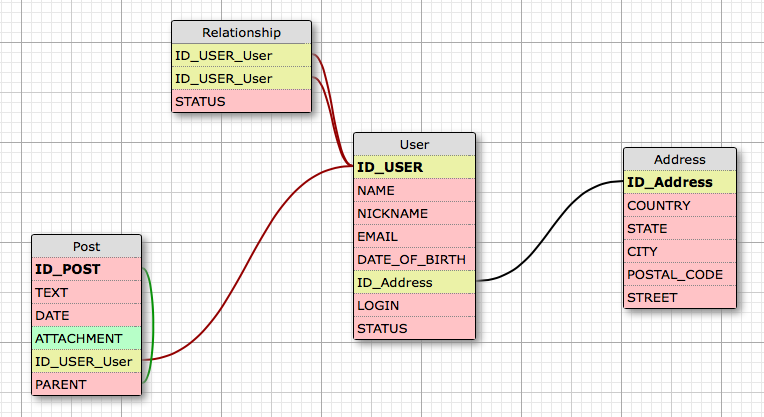

#### Exercise 3.2

Write a view to retrieve the posts to display when a user logs in. Consider that some users may have a lot of friends and you need to limit the number of post to display. How would you select relevant posts to display first? What kind of information would you use/add in the database for this purpose? Explain your answer.

__Note:__ Limiting the number of posts just by count is too simplistic, the user could be missing something interesting to him/her.

CREATE VIEW Session as
SELECT Post.TEXT, Post.DATE, Post.ATTACHMENT, User.NICKNAME
FROM Post, User, Relationship
WHERE Post.ID_USER = User.ID_USER 
AND User.ID_USER IN
(SELECT Relationship.ID_USER1 -- ID_USER1 = ID_USER of friend
FROM Relationship
WHERE Relation.ID_USER2 = User.ID_USER) -- ID_USER2 = ID_USER of user

Should we want to have a hierarchy in posts display then we should add additional fields such that hobbys, rating of friends, rating of post (number of times a post has been seen, number of likes), date of post (most recent first)...